In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean

# path_to_txt = 'C:/Users/egeme/Desktop/Kuva/GMAT_OrbitalSims/LTDN1030/12U/12U_350/Exotrail/FlightProfile.txt'
path_to_txt = 'C:/Users/egeme/Desktop/Kuva/GMAT_OrbitalSims/LTDN1030/12U/12U_350/Exotrail/Detailed/12U_ExotrailM+_PerpendicularLifetime.txt'
dataset = pd.read_fwf(path_to_txt)

In [67]:
elapsed_days = dataset['SC.ElapsedDays'].values.tolist()
alt_list = dataset['SC.Earth.Altitude'].values.tolist()
fuel_qty = dataset['SC.ElectricTank1.FuelMass'].values.tolist()
sma_list = dataset['SC.Earth.SMA'].values.tolist()
number_of_burns = dataset['Number_Of_Burns'].values.tolist()
burn_durations = dataset['BurnDur550'].values.tolist()

changelist = [i for i in range(1,len(fuel_qty)) if fuel_qty[i]!=fuel_qty[i-1] ]

# Drag area during descent, %20 duty cycle
# Drag area during mission, full streamlined

# Exotrail L, 0.7kg fuel mass
# Exotrail M+, 0.4kg fuel mass
# 2.5e-3 N, 800s Isp

In [69]:
print('Simulation Duration:', round(max(elapsed_days),2),' days')
print('Max Δv: ', round(800*9.81*np.log(25/(25-max(fuel_qty))),2))
print('Number of Burns:', max(number_of_burns))
print('Longest burn duration: ', max(burn_durations))
print('Shortest burn duration: ', min(burn_durations[changelist[0]:]))
print('Average burn duration: ', mean(burn_durations[changelist[0]:]))

Simulation Duration: 469.61  days
Max Δv:  126.58
Number of Burns: 762
Longest burn duration:  2241.57725
Shortest burn duration:  1295.18615
Average burn duration:  1665.165902330514


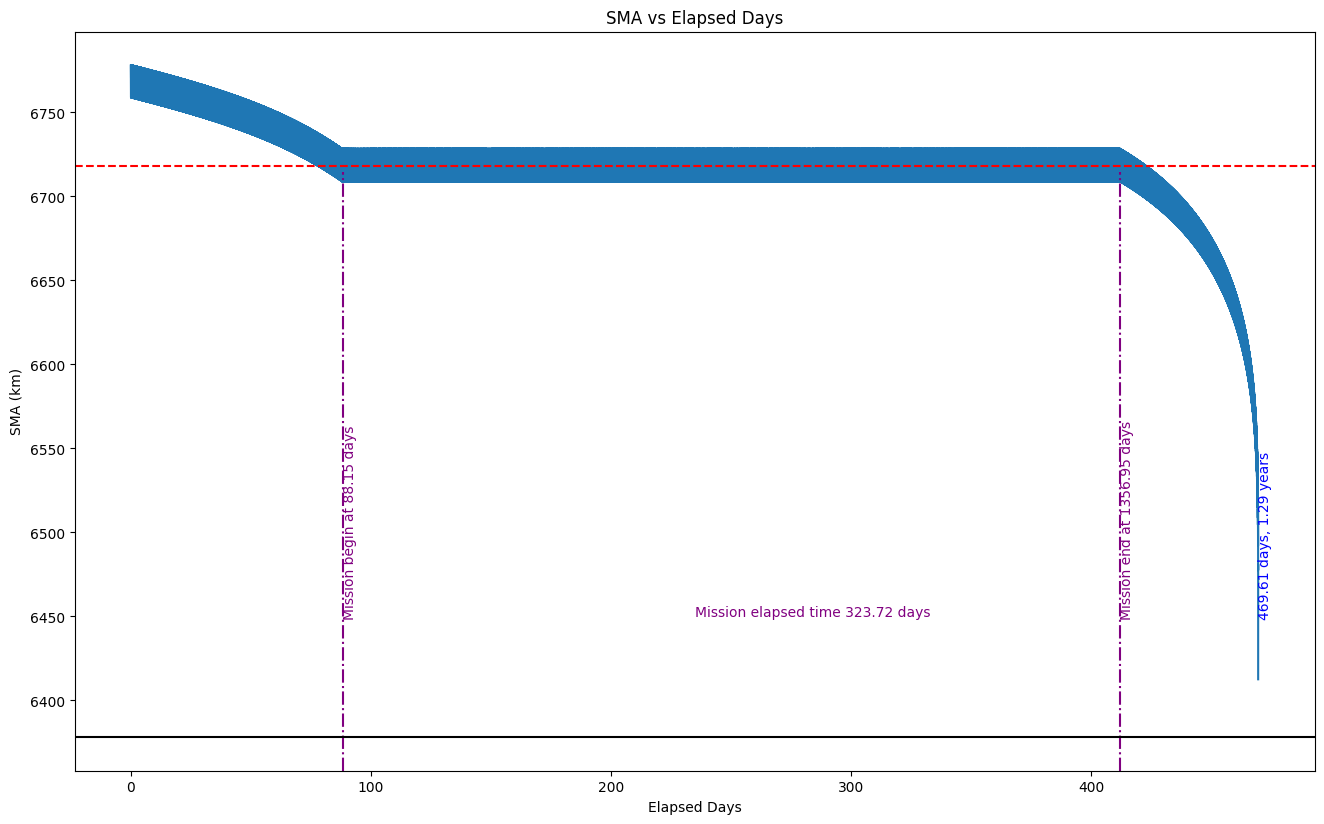

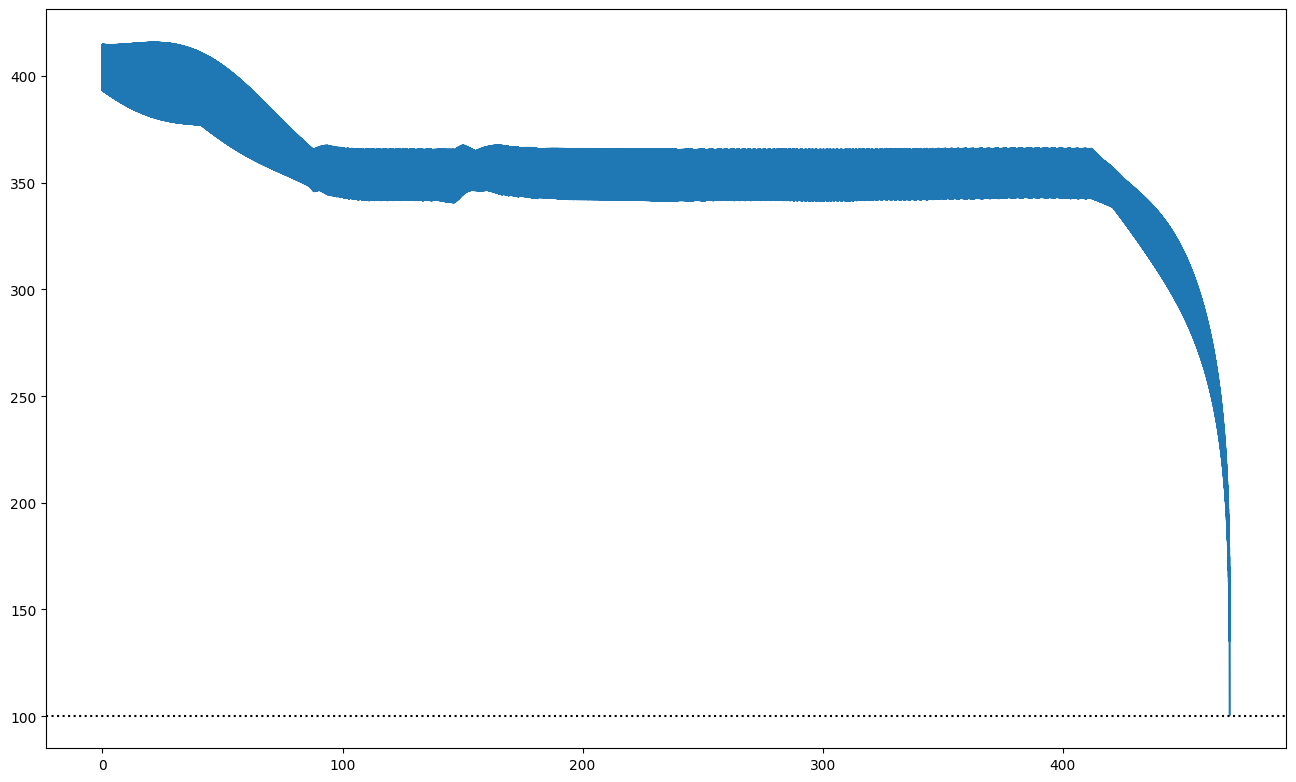

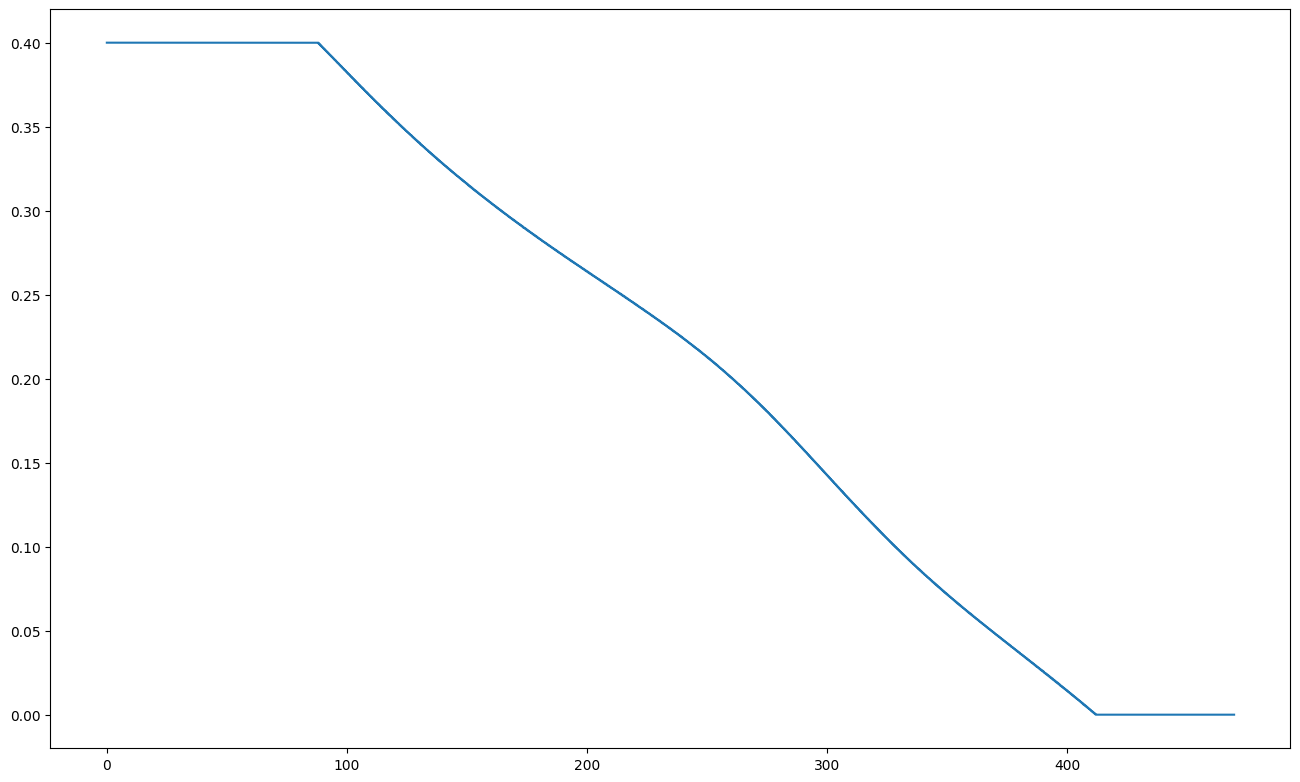

In [61]:

max_lenght = round(max(elapsed_days),2)
message = str(max_lenght) + ' days, ' + str(round(max_lenght/365,2)) +' years'
missiontime = 'Mission elapsed time ' + str(round(elapsed_days[changelist[-1]]-elapsed_days[changelist[0]],2)) + ' days'

plt.figure(figsize=(16,9.6))
plt.title('SMA vs Elapsed Days')
plt.ylabel('SMA (km)')
plt.xlabel('Elapsed Days')
plt.plot(elapsed_days,sma_list)
plt.text(elapsed_days[-1],6450,message,color='b', rotation=90)
plt.axhline(350+6368.14, color='r', linestyle='--')
plt.axvline(elapsed_days[changelist[0]],0,0.81,color='purple',linestyle='-.')
plt.axvline(elapsed_days[changelist[-1]], 0,0.81,color='purple',linestyle='-.')

plt.axhline(6378.14,0,color='black')


plt.text((elapsed_days[-1]+elapsed_days[0])/2,6450, missiontime, color='purple')
plt.text(elapsed_days[changelist[0]], 6450, 'Mission begin at 88.15 days' ,color='purple',rotation=90 )
plt.text(elapsed_days[changelist[-1]], 6450, 'Mission end at 1356.95 days' ,color='purple',rotation=90 )
plt.show()


plt.figure(figsize=(16,9.6))
plt.plot(elapsed_days,alt_list)
plt.axhline(100,0,color='black',linestyle='dotted')
plt.show()

plt.figure(figsize=(16,9.6))
plt.plot(elapsed_days,fuel_qty)
plt.show()


91731 1405850


In [26]:
(elapsed_days[-1]+elapsed_days[0])/2

234.80670268627

6412.557895427908